In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("hw01.ipynb")

<div class="alert alert-success" markdown="1">

#### Homework 1

# Python Fundamentals

### EECS 398-003: Practical Data Science, Fall 2024

#### Due Thursday, September 5th at 11:59PM
    
</div>

## Instructions

Welcome to Homework 1! In this homework, you will practice with core features of the Python language, including defining functions, writing conditional statements and loops, and working with lists and strings. You'll also gain experience in reading documentation to figure out how to work with unfamiliar libraries. See the [Readings section of the Resources tab on the course website](https://practicaldsc.org/resources/#readings) for supplemental resources.

You are given six slip days throughout the semester to extend deadlines. See the [Syllabus](https://practicaldsc.org/syllabus) for more details. With the exception of using slip days, late work will not be accepted unless you have made special arrangements with your instructor.

To access this notebook, you'll need to clone our [public GitHub repository](https://github.com/practicaldsc/fa24/). The [⚙️ Environment Setup](https://practicaldsc.org/env-setup) page on the course website walks you through the necessary steps. Once you're done, you'll submit your completed notebook to Gradescope.

Please start early and submit often. You can submit as many times as you'd like to Gradescope, and we'll take your **most recent** submission. Remember that the public `grader.check` tests in your notebook are not comprehensive, and that your work will also be graded on hidden test cases on Gradescope after the submission deadline.

This homework is worth a total of **40 points**. The number of points each question is worth is listed at the start of each question. **The four parts of the assignment are independent**; with the exception of Part 1, in which the questions build off one another, you can complete the questions in any order. Tip: if you're using Jupyter Lab, you can see a Table of Contents for the notebook by going to View > Table of Contents.

To get started, run the import cell below.

In [3]:
import numpy as np
from IPython.display import HTML, YouTubeVideo, clear_output
from ipywidgets import interact

## Part 1: Death and Taxes 💰💸

---

The United States, like many countries, uses a progressive tax bracket system. This means that as your earnings increase, the percentage of your earnings you owe in tax also increases. In addition, the US tax system uses marginal tax brackets – what this means is that US taxpayers pay different tax percentages on different "chunks" of their earnings.

Let's suppose the tax brackets for the 2024 tax year for single filers are defined by the table below. These are close to the actual brackets, but for simplicity's sake we'll use 5 brackets instead of 7. 

| Tax Bracket | Taxable Income |
| --- | --- |
| 10% | [$0, \\$11,000] |
| 12% | (\\$11,000, \\$44,725] |
| 22% | (\\$44,725, \\$95,375] |
| 24% | (\\$95,375, \\$182,100] |
| 32% | Over \\$182,100 |

**You will need to use these numbers throughout Questions 1-3.**

A few notes:
- The notation $(a, b]$ means "greater than $a$ and less than or equal to $b$". For example, someone with a taxable income of \\$44,725 is in the 12% bracket, but someone with a taxable income of \\$44,725.01 is in the 22% bracket. For simplicity, we will only test your code on integer values of taxable income.
- "Taxable income" refers to the part of one's income that is taxable; in the US there is what's known as a "standard deduction" which can be thought of as a discount on your taxes. Here, we won't worry about deductions.

If someone has a taxable income of \\$75,000, we say they are in the 22% tax bracket. However, such an individual doesn't owe 22% of \\$75,000 in taxes. Instead, they owe:
- 10% of \\$11,000, **plus**
- 12% of \\$33,725 (which is \\$44,725 - \\$11,000), **plus**
- 22% of \\$30,275 (which is \\$75,000 - \\$44,725).

More concretely, their tax owed is:
$$0.1 \cdot \$11{,}000 + 0.12 \cdot \$33{,}725 + 0.22 \cdot \$30{,}275 = \$11{,}807.50.$$ 

This makes their **effective tax rate**:
$$\frac{\$11{,}807.50}{\$75{,}000} = 0.15743,$$
or 15.743\%, because they wound up having to pay 15.743\% of their taxable income in taxes. We will give effective tax rates as percentages, rounded to three decimal places.

If you want to read more about the US federal income tax system, click [here](https://www.taxpolicycenter.org/briefing-book/how-do-federal-income-tax-rates-work).

### Question 1: Tax Brackets <div style="display:inline-block; vertical-align: middle; padding:7px 7px; font-size:10px; font-weight:light; color:white; background-color:#e84c4a; border-radius:7px; text-align:left;">3 Points</div>

Complete the implementation of the function `tax_bracket`, which takes in a taxable income, `income`, and returns the tax bracket it is in, as a **proportion**. Assume that `income` is a non-negative integer. Example behavior is given below.

```python
>>> tax_bracket(75000)
0.22

>>> tax_bracket(402150)
0.32
```

For your convenience, the tax bracket table is shown again below.

| Tax Bracket | Taxable Income |
| --- | --- |
| 10% | [$0, \\$11,000] |
| 12% | (\\$11,000, \\$44,725] |
| 22% | (\\$44,725, \\$95,375] |
| 24% | (\\$95,375, \\$182,100] |
| 32% | Over \\$182,100 |

In [4]:
def tax_bracket(income):
    if(income <= 11000):
        return 0.10
    elif(income <= 44725):
        return 0.12
    elif(income <= 95375):
        return 0.22
    elif(income <= 182100):
        return 0.24
    else:
        return 0.32

# Feel free to change this input to make sure your function works correctly.
tax_bracket(11000)

0.1

In [5]:
tax_bracket(11000)

0.1

In [6]:
grader.check("q1")

q1 results: All test cases passed!

### Question 2: Tax Owed <div style="display:inline-block; vertical-align: middle; padding:7px 7px; font-size:10px; font-weight:light; color:white; background-color:#e84c4a; border-radius:7px; text-align:left;">6 Points</div>

Complete the implementation of the function `tax_owed`, which takes in a taxable income, `income`, and returns the amount of tax owed by an individual with that taxable income. Assume that `income` is a non-negative integer. Example behavior is given below.

```python
>>> tax_owed(75000)
11807.5
```

For your convenience, the tax bracket table is shown again below.

| Tax Bracket | Taxable Income |
| --- | --- |
| 10% | [$0, \\$11,000] |
| 12% | (\\$11,000, \\$44,725] |
| 22% | (\\$44,725, \\$95,375] |
| 24% | (\\$95,375, \\$182,100] |
| 32% | Over \\$182,100 |

Below are some suggested steps to break down this problem into manageable chunks.
1. Make sure you understand the example calculating the tax owed on \\$75,000 of taxable income. 
2. Once you're sure you understand the given example calculation, then calculate the tax owed for a different taxable income, say \\$152,000, by hand. 
3. In a blank cell in your notebook, write Python code to compute the tax owed for \\$152,000 in taxable income and verify you get the same answer as when you did it by hand. 
4. Once you have that working, write the more general function and test it on a variety of inputs.

In [7]:
def tax_owed(income):
    if(income <= 11000):
        return 0.10 * income
    elif(income <= 44725):
        return 0.10 * 11000 + 0.12 * (income-11000)
    elif(income <= 95375):
        return 0.10 * 11000 + 0.12 * (44725-11000) + 0.22 * (income - 44725)
    elif(income <= 182100):
        return 0.10 * 11000 + 0.12 * (44725-11000) +0.22 * (95375-44725) + 0.24 * (income-95375)
    else:
        return 0.10 * 11000 + 0.12 * (44725-11000) +0.22 * (95375-44725) + 0.24 * (182100-95375) + 0.32 * (income - 182100)

# Feel free to change this input to make sure your function works correctly.
tax_owed(75000)

11807.5

In [8]:
tax_owed(75000)

11807.5

In [9]:
grader.check("q2")

q2 results: All test cases passed!

### Question 3: Effective Tax Rate <div style="display:inline-block; vertical-align: middle; padding:7px 7px; font-size:10px; font-weight:light; color:white; background-color:#e84c4a; border-radius:7px; text-align:left;">2 Points</div>

Finally, complete the implementation of `effective_tax_rate`, which takes in a taxable income, `income`, and returns the effective tax rate for an individual with that taxable income, as a **percentage** rounded to three decimal places. Here, `income` is still an integer, but don't assume that `income` is non-negative; if it is less than or equal to 0, return `0`. Example behavior is given below.

```python
>>> effective_tax_rate(75000)
15.743

# If income is <= 0, return 0.
>>> effective_tax_rate(-15)
0
```

In [10]:
def effective_tax_rate(income):
    if (income < 0):
        return 0;  
    return round((tax_owed(income) / income)*100,3)

In [11]:
effective_tax_rate(75000)

15.743

In [12]:
grader.check("q3")

q3 results: All test cases passed!

### Fun Demo

You just did all of the math necessary to build an income tax calculator, like the ones you see on many financial websites. Run the following cell once you've completed the rest of this question!

In [13]:
# Don't worry about the code, just play with the slider that appears after running.
def plot_income_calculator(income):
    s = f'''
    <h1>EECS 398-003 Tax Calculator 💰💸</h1>
    <h3>{'${:,.2f}'.format(income)}</h3>
    Taxable Income
    
    <h2>{'${:,.2f}'.format(tax_owed(income))}</h2>
    Tax Owed
    
    <h3>{'{:,.1f}'.format((effective_tax_rate(income))) + '%'}</h3>
    Effective Tax Rate
    
    '''
    display(HTML(s))
    
interact(plot_income_calculator, income=(0, 200000, 1000));

interactive(children=(IntSlider(value=100000, description='income', max=200000, step=1000), Output()), _dom_cl…

<br>

## Part 2: Fun with Loops 🔁

---

In this part, you'll work through a few separate questions that involve writing loops in Python.

### Question 4: Collatz Conjecture <div style="display:inline-block; vertical-align: middle; padding:7px 7px; font-size:10px; font-weight:light; color:white; background-color:#e84c4a; border-radius:7px; text-align:left;">5 Points</div>

Before we get started, observe the behavior in the cell below:

In [14]:
def my_function(stuff):
    print(stuff + 2)
    print('hey' * stuff)
    return (stuff + 0.1) ** 2

my_function(6)

8
heyheyheyheyheyhey


37.209999999999994

- The values `8` and `'heyheyheyheyheyhey'`are **printed**, because we used the `print` function to display them within the body of `my_function`. No numbers appear in square brackets to the left of these values.
- The value `37.2099999999` is displayed, even though we didn't explicitly ask for it to be displayed. That's because it's the value of the last expression in the cell, i.e. it is what the function `my_function` returned when called on the input `6`. Note a value in square brackets to the left of it, e.g. `[55]`.

Keep this in mind as you work through this question, as you'll have to `print` some values and `return` other values in the function you define.

Now, run the following cell and watch the video that pops up. It's short.

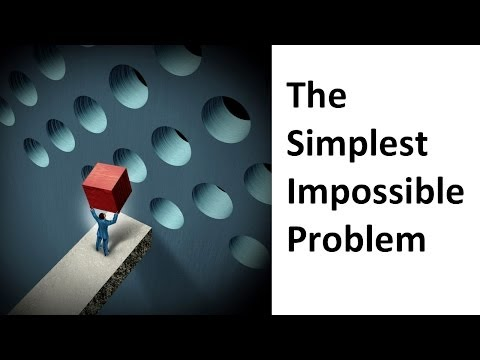

In [15]:
YouTubeVideo('m4CjXk_b8zo', width=600, height=300)

The video above describes the [Collatz conjecture](https://en.wikipedia.org/wiki/Collatz_conjecture), which says the following:

1. Pick a positive integer `n` as the start.
2. If `n` is even, divide it by 2.
3. If `n` is odd, multiply it by 3 and add 1.
4. Continue this process until `n` is 1.

The number `n` will travel up and down but eventually end at 1 (at least for all numbers that have ever been tried – nobody has ever proved that the sequence will terminate). Analogously, a hailstone travels up and down in the atmosphere before eventually landing on earth, which is why this sequence is sometimes called the **hailstone sequence**.

For instance, if we start with $n = 10$:

$$10 \rightarrow 5 \rightarrow 16 \rightarrow 8 \rightarrow 4 \rightarrow 2 \rightarrow 1$$

So, **for $n = 10$, we'd say the hailstone sequence is of length 7.**

Complete the implementation of the function `hailstone`, which takes in a positive integer `n`, **prints** out the hailstone sequence starting at `n` (including `n` and `1`), and **returns** the **length** of the sequence. Example behavior is given below.

```python
In  [5]: hailstone(10)
         10
         5
         16
         8
         4
         2
         1
Out [5]: 7
```

Note that the `[5]` above is arbitrary; what's meant to be highlighted is the fact that the numbers 10, 5, 16, ..., 1 are being printed, but the value of `hailstone(10)` is `7`.

***Hint***: You'll need to write the kind of loop that we **didn't** write in [Lecture 2](https://practicaldsc.org/resources/lectures/lec02/lec02.html). It's a good idea to write out the hailstone sequence for an arbitrary number by hand on paper to make sure you understand how it works.

In [16]:
def hailstone(n):
    x = 1
    while n != 1:
        print(n)
        if n % 2 == 0:
            n = n // 2
            x = x + 1
        else:
            n = 3 * n + 1
            x = x + 1
    print(n)
    return x
# Feel free to change this input to make sure your function works correctly.
hailstone(10)

10
5
16
8
4
2
1


7

In [17]:
grader.check("q4")

q4 results: All test cases passed!

### Question 5: Alternating Sign Mean <div style="display:inline-block; vertical-align: middle; padding:7px 7px; font-size:10px; font-weight:light; color:white; background-color:#e84c4a; border-radius:7px; text-align:left;">4 Points</div>

In math, the word "alternating" is sometimes used to indicate that the signs of the elements of a sequence oscillate, or "bounce", back and forth between positive and negative.

Complete the implementation of the function `alternating_sign_mean`, which takes in a list of positive numbers, `values`, and computes the mean of **_every_ element** in the original list with **alternating signs**, starting with a positive sign for the element at position 0, a negative sign for the element at position 1, and so on. Example behavior is shown below.

```python
>>> alternating_sign_mean([3, 2, 9.5])
3.5 # Comes from (3 + (-2) + 9.5) / 3.

>>> alternating_sign_mean([3, 2.5, 7, 6.5])
0.25 # Comes from (3 + (-2.5) + 7 + (-6.5)) / 4.
```

Note that you **should not** use any additional packages (e.g. `math`, `numpy`) in your solution – everything should be done using base Python.

In [18]:
def alternating_sign_mean(values):
    x = 0
    res = 0
    for i in values:
        if x%2 == 0:
            res = res + i
        else:
            res = res - i
        x = x + 1
    return res / len(values)
    
# Feel free to change this input to make sure your function works correctly.
alternating_sign_mean([3, 2.5,7, 6.5])

0.25

In [19]:
grader.check("q5")

q5 results: All test cases passed!

### Question 6: Big Tippers <div style="display:inline-block; vertical-align: middle; padding:7px 7px; font-size:10px; font-weight:light; color:white; background-color:#e84c4a; border-radius:7px; text-align:left;">5 Points</div>

Suppose we are waiters at a restaurant, and we keep track of the tips that we receive in a given night. Specifically, we store in a list the first names of our customers along with the tip that they gave, like so:

```python
[name_1, tip_1, name_2, tip_2, name_3, tip_3, ...]
```

Names are strings, while tips are non-negative numbers, either `int` or `float`.

Complete the implementation of the function `big_tippers`, which takes in a list `tips` as described above and returns only the names of the customers who tipped **strictly more** than the average tip. Example behavior is given below.

```python
>>> tips = ['yutong', 15, 'kyle', 9, 'pranavi', 19]
>>> big_tippers(tips)
['yutong', 'pranavi']
```

In the example above, the average tip is $\frac{15 + 9 + 19}{3} = 14.33$, and both `'yutong'` and `'pranavi'` tipped more than that, so your function should return `['yutong', 'pranavi']`.

You may assume that `tips` is well-formed, i.e. has an even, positive number of entries, in the correct order.

Note that you **should not** use any additional packages (e.g. `math`, `numpy`) in your solution – everything should be done using base Python.

In [20]:
def big_tippers(tips):
    tip_count = 0
    res = []
    for i in tips:
        if type(i) == int:
            tip_count = tip_count + i
    tip_count = tip_count / (len(tips)/2)
    for i in range(len(tips)):
        if type(tips[i]) == int and tips[i] > tip_count:
            res.append(tips[i-1])
    return res
            
    
            

# Feel free to change this input to make sure your function works correctly.
big_tippers(['yutong', 1, 'kyle', 9, 'pranavi', 19])

['pranavi']

In [21]:
big_tippers(['yutong', 18, 'kyle', 19, 'pranavi', 19])

['kyle', 'pranavi']

In [22]:
grader.check("q6")

q6 results: All test cases passed!

## Part 3: String Theory 🧵

---

In this part, you'll practice working with strings in Python. It's a good idea to review the [Strings section of Lecture 2](https://practicaldsc.org/resources/lectures/lec02/lec02.html#Strings) before proceeding.

### Question 7: Running, Eating, and Living <div style="display:inline-block; vertical-align: middle; padding:7px 7px; font-size:10px; font-weight:light; color:white; background-color:#e84c4a; border-radius:7px; text-align:left;">2 Points</div>

Complete the implementation of the function `is_ing`, which takes in a string `s` and returns `True` if `s` ends in "ing" and `False` otherwise. Example behavior is given below.

```python
>>> is_ing('running')
True

# Not case sensitive!
>>> is_ing('eatInG')
True

>>> is_ing('science')
False

>>> is_ing('25')
False
```

In [23]:
def is_ing(s):
    if ((s[-1] == 'g' or s[-1] == 'G') and (s[-2] == 'n' or s[-2] == 'N') and (s[-3] == 'i' or s[-3] ==  'I')):
        return True
    return False

# Feel free to change this input to make sure your function works correctly.
is_ing('runnIng')

True

In [24]:
grader.check("q7")

q7 results: All test cases passed!

### Question 8: Pump the Brakes <div style="display:inline-block; vertical-align: middle; padding:7px 7px; font-size:10px; font-weight:light; color:white; background-color:#e84c4a; border-radius:7px; text-align:left;">3 Points</div>

Complete the implementation of the function `pump`, which takes in a string `base` and integer `rep` and returns a string with the same first and last characters as `base`, and with everything except the first and last characters in `base` repeated `rep` times. Example behavior is given below.

```python
>>> pump('zebra', 4)
'zebrebrebrebra'

# If base is <= 2 characters long, return base.
>>> pump('hi', 2)
'hi'
```

In [25]:
def pump(base, rep):
    if len(base) <= 2:
        return base
    res = "" 
    res = res + base[0]
    repeat = ""
    for i in range(1, len(base)-1):
        repeat = repeat + base[i]
    res = res + repeat * rep
    res = res + base[-1]
    return res

# Feel free to change this input to make sure your function works correctly.
pump('zebra', 4)

'zebrebrebrebra'

In [26]:
grader.check("q8")

q8 results: All test cases passed!

### Question 9: $n$ Prefixes <div style="display:inline-block; vertical-align: middle; padding:7px 7px; font-size:10px; font-weight:light; color:white; background-color:#e84c4a; border-radius:7px; text-align:left;">4 Points</div>

Complete the implementation of the function `n_prefixes`, which takes in a string `s` and a positive integer `n`, and returns a string containing the first `n` consecutive prefixes of `s` in reverse order. Example behavior is given below.

```python
>>> n_prefixes('Billy!', 4)
'BillBilBiB'

>>> n_prefixes('Michigan', 3)
'MicMiM'
```

Let's take a closer look at the first example above. The consecutive prefixes of `'Billy!'` are:
- `'B'`
- `'Bi'`
- `'Bil'`
- `'Bill'`
- `'Billy'`
- `'Billy!'`

The first 4 of these are `'B'`, `'Bi'`, `'Bil'`, and `'Bill'`. If we combine these 4 in reverse order, we get `'BillBilBiB'`, which is what `n_prefixes('Billy!', 4)` should return.

You may assume that `n <= len(s)`.

In [27]:
def n_prefixes(s, n):
    i = 0
    res = ""
    while n > 0:
        i = 0 
        while i < n:
            res = res + s[i]
            i +=1
        n -= 1
    return res

# Feel free to change this input to make sure your function works correctly.
n_prefixes('Billy!', 4)

'BillBilBiB'

In [28]:
grader.check("q9")

q9 results: All test cases passed!

## Part 4: Plotly 📈

---

As a data scientist, you're often going to have to work with unfamiliar libraries. In this final part of the homework, you're going to familiarize yourself with `plotly`, a library for making interactive visualizations in Python. `plotly` is the library we used to make the bar charts and line charts in [Lecture 1](https://practicaldsc.org/resources/lectures/lec01/lec01.html). We'll gain more exposure to using `plotly` for data analysis specifically in lecture and future homeworks, but in this question, you'll learn how to use it for a different (but related) purpose: graphing functions. We'll use it as an opportunity to review key concepts from calculus, too.

Run the cell below to load in the necessary `plotly` modules (there are a few).

In [29]:
import plotly.express as px
import plotly.graph_objects as go

First, let's walk through an example. Consider the function $f(x)$:

$$f(x) = x^2 - 12x + 3$$

$f$ is a degree-2 polynomial, and has the shape of a parabola. To plot a graph of $f$, we could use the following code:

In [30]:
def f(x):
    return x**2 - 12 * x + 3

xs = np.linspace(-10, 30)
ys = f(xs)

fig = px.line(x=xs, y=ys, width=600, template='simple_white')
fig.add_trace(go.Scatter(x=[20], y=[163], mode='markers', marker=dict(color='red'), name='Random Point'))

There are many ways you can customize a `plotly` graph. Some features are customized by setting various [keyword arguments](https://www.w3schools.com/python/gloss_python_function_keyword_arguments.asp) in the `px.<plot type>` function when you call it, and others are customized by using `fig.add_trace`, `fig.update_traces`, or `fig.update_layout` on the resulting `fig` object afterwards. Here, we used `fig.add_trace` to add a particular point to the plot.

Remember that in a Jupyter Notebook, you can view the documentation (including the possible arguments) for a function inline. To see the documentation, run `function?`, where function is the name of the function.

In [31]:
px.line?

Signature:
px.line(
    data_frame=None,
    x=None,
    y=None,
    line_group=None,
    color=None,
    line_dash=None,
    symbol=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    text=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    error_x=None,
    error_x_minus=None,
    error_y=None,
    error_y_minus=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    orientation=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    line_dash_sequence=None,
    line_dash_map=None,
    symbol_sequence=None,
    symbol_map=None,
    markers=False,
    log_x=False,
    log_y=False,
    range_x=None,
    range_y=None,
    line_shape=None,
    render_mode='auto',
    title=None,
    template=None,
    width=None,
    height=None,
) -> plotly.graph_objs._figure.Figure
Docstring:
    In a 2D line plot, each row of `data_frame` i

To see possible functions in a module, you can use tab to autocomplete. Check out what happens when you hit tab in the cell below.

In [32]:
px.line_3d(x=xs, y=ys, width=600, template='simple_white')
fig.add_trace(go.Scatter(x=[2], y=[13], mode='markers', marker=dict(color='red'), name='Random Point'))

And once you've picked a function, and you're exploring the various keyword arguments it supports, you can use tab to get suggestions as well:

<center><img src="imgs/tab.png" width=200></center>

With that said, it's time for your job.

### Question 10: Recreation <div style="display:inline-block; vertical-align: middle; padding:7px 7px; font-size:10px; font-weight:light; color:white; background-color:#e84c4a; border-radius:7px; text-align:left;">6 Points</div>

Below, assign `polyfig` to a `plotly` Figure object, corresponding to the graph of the following polynomial:

$$g(x) = 2x^3 - 15x^2 + 36x - 5$$

You can choose the colors, theme, etc. of your graph yourself. However, your graph must have:

- A title of your choosing.
- A plot of $g(x)$.
- An $x$-axis range of 1 to 4.
- A width of 800 and a height of 600.
- On top of the plot of $g(x)$, two **points**: one at the local maximum of $g(x)$ and one at the local minimum of $g(x)$. **You'll need to do some math to figure out where these are!** These should appear in the legend as `'Local Maximum'` and `'Local Minimum'`, respectively, and should be colored with different colors.
- A legend whose title says `'Legend'`.

You can get pretty far by copying the code we gave a few cells above to create $f(x)$, but you'll need to do some research to figure out how to achieve the goals we set out.

Yes, this question is also autograded! Unlike other questions, this question has no hidden tests, so you'll be able to verify if your graph meets our requirements before you submit.

In [33]:
def g(x):
    return 2*(x**3)- 15*(x**2) + 36*(x) - 5

xs = np.linspace(1,4)
ya = g(xs)

polyfig = px.line(x=xs, y=ya, width=800, height=600, title="HW 1 plot :)", template ='simple_white')

polyfig.add_trace(go.Scatter(x=[2], y=[23], mode='markers', marker=dict(color='red'), name='Local Maximum'))
polyfig.add_trace(go.Scatter(x=[3], y=[22], mode='markers', marker=dict(color='green'), name='Local Minimum'))
polyfig.update_layout(legend_title_text='Legend')

In [34]:
grader.check("q10")

q10 results: All test cases passed!

## Finish Line 🏁

Congratulations! You're ready to submit Homework 1.

To submit your homework:

1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells.
2. Read through the notebook to make sure everything is fine and all tests passed.
3. Run the cell below to run all tests, and make sure that they all pass.
4. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope under "Homework 1".
5. Stick around while the Gradescope autograder grades your work. Make sure you see that all **public tests** have passed on Gradescope. **Remember that homeworks have hidden tests, which you will not see your scores on until a few days after the deadline!**
6. Check that you have a confirmation email from Gradescope and save it as proof of your submission.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [35]:
grader.check_all()

q1 results: All test cases passed!

q10 results: All test cases passed!

q2 results: All test cases passed!

q3 results: All test cases passed!

q4 results: All test cases passed!

q5 results: All test cases passed!

q6 results: All test cases passed!

q7 results: All test cases passed!

q8 results: All test cases passed!

q9 results: All test cases passed!